## Suppose you have to design or modify HR policy of a company related to workplace accident compensation. You have the attached data to analyse.This company has plants in three countries, in 12 locations.

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import statistics as s
import nltk as n
from nltk.corpus import stopwords

In [3]:
from google.colab import files
files.upload()

Saving IHMStefanini_industrial_safety_and_health_database_with_accidents_description (1).csv to IHMStefanini_industrial_safety_and_health_database_with_accidents_description (1).csv


{'IHMStefanini_industrial_safety_and_health_database_with_accidents_description (1).csv': b',Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description\r\n0,1/1/2016 0:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,"While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo."\r\n1,1/2/2016 0:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,"During the activation of a sodium sulphide pump, the piping was uncoupled and the sulfide solution was designed in the area to reach the maid. Immediate

In [5]:
df2= pd.read_csv("IHMStefanini_industrial_safety_and_health_database_with_accidents_description (1).csv") 

In [6]:
industry_sector =df2['Industry Sector']
industry_sector_list=[]


for i in industry_sector:
    if i in industry_sector_list:
        None
    else:
        industry_sector_list.append(i)
        
print(industry_sector_list)

['Mining', 'Metals', 'Others']


# **Graph representing the portion of accidents by country**

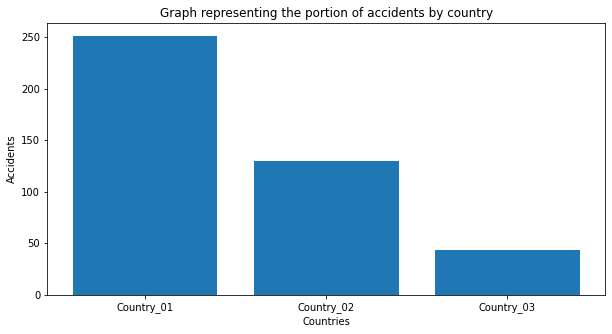

In [7]:
temp=df2.groupby('Countries').count().reset_index()


plt.figure(figsize=(10,5))
plt.bar(temp['Countries'],temp['Data'])
plt.title('Graph representing the portion of accidents by country')
plt.xlabel('Countries')
plt.ylabel('Accidents')
plt.show()

# **Graph representing the portion of accidents by sector**

Text(0.5, 1.0, 'Graph representing the portion of accidents by sector')

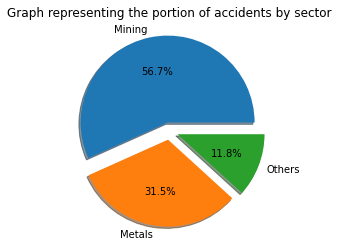

In [8]:
secteur= df2.groupby('Industry Sector').count().sort_values(by=['Data'],ascending = False).reset_index()

plt.pie(secteur['Data'], labels= secteur['Industry Sector'], autopct='%1.1f%%', shadow = True, explode = [0.1, 0.1, 0.1], radius = 1) 
plt.title("Graph representing the portion of accidents by sector")

# **Graph representing the proportion of accidents by gender**

The number of accidents suffered by males =  403
The number of accidents suffered by femelles =  22


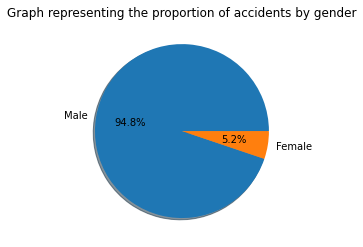

In [9]:
genre=df2.groupby('Genre').count().sort_values(by=['Data'], ascending = False).reset_index()


plt.pie(genre['Data'], labels = genre['Genre'], autopct='%1.1f%%', shadow = True)
plt.title('Graph representing the proportion of accidents by gender')

print("The number of accidents suffered by males = ",genre.loc[0,'Data'])
print("The number of accidents suffered by femelles = ",genre.loc[1,'Data'])

# **Graph representing the accident breakdown by Local**

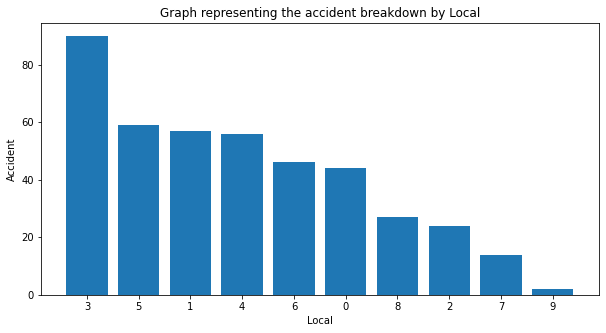

The average accident per local =  35.416666666666664


In [10]:
local = df2.groupby('Local').count().sort_values(by=['Data'], ascending = False).reset_index()



locals = []
for x in local['Local']:
    locals.append(x[7:])

plt.figure(figsize=(10,5))
plt.bar(locals,local['Data'])
plt.xlabel("Local")
plt.ylabel("Accident")
plt.title("Graph representing the accident breakdown by Local")
plt.show()

print("The average accident per local = ",s.mean(local['Data']))

In [11]:
df2.head()

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,1/1/2016 0:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,1/2/2016 0:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,1/6/2016 0:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,1/8/2016 0:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,1/10/2016 0:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                425 non-null    int64 
 1   Data                      425 non-null    object
 2   Countries                 425 non-null    object
 3   Local                     425 non-null    object
 4   Industry Sector           425 non-null    object
 5   Accident Level            425 non-null    object
 6   Potential Accident Level  425 non-null    object
 7   Genre                     425 non-null    object
 8   Employee or Third Party   425 non-null    object
 9   Critical Risk             425 non-null    object
 10  Description               425 non-null    object
dtypes: int64(1), object(10)
memory usage: 36.6+ KB


# **Critical risk classification:**

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 <a list of 33 Text major ticklabel objects>)

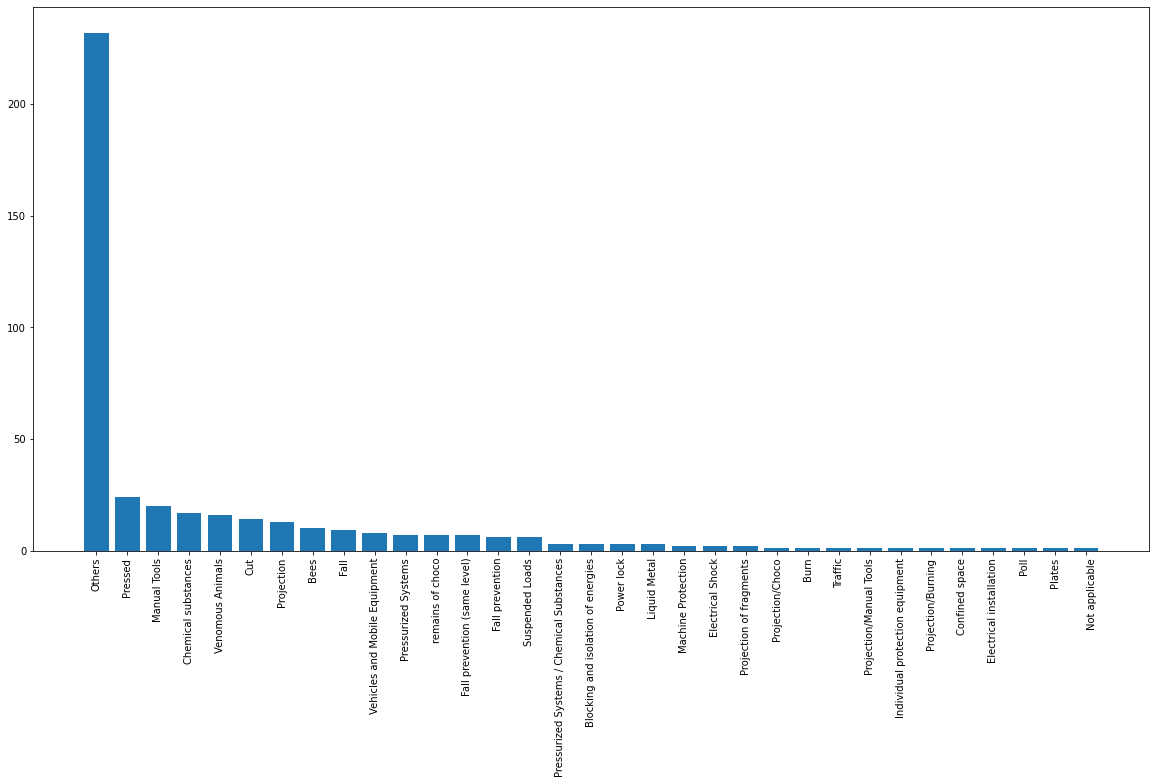

In [13]:
risk=df2.groupby('Critical Risk').count().sort_values(by=['Data'], ascending = False).reset_index()

plt.figure(figsize=(20,10))
plt.bar(risk['Critical Risk'],risk['Data'])
plt.xticks(rotation = 'vertical')

The distribution of accidents suffered by employees:

Text(0.5, 1.0, 'Repartition des accidents subis par des employees ou des interimaires')

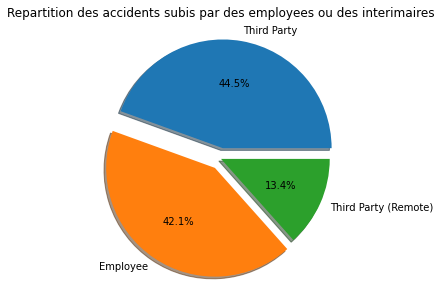

In [14]:
interi=df2.groupby('Employee or Third Party').count().sort_values(by = ['Data'], ascending = False).reset_index()
plt.figure(figsize=(10,5))
plt.pie(interi['Data'], labels =interi['Employee or Third Party'], autopct='%1.1f%%', shadow = True, explode=[0.1, 0.1, 0])
plt.title('Repartition des accidents subis par des employees ou des interimaires')

# **Is there a correlation in the level of accident and the potential level of accident?**

In [15]:
accident_level= df2.groupby('Accident Level').count().sort_values(by=['Data'],ascending = False).reset_index()

pot_accident_level= df2.groupby('Potential Accident Level').count().sort_values(by = ['Data'], ascending = False).reset_index()

df_al=accident_level.loc[:,'Accident Level': 'Data']
df_pal = pot_accident_level.loc[:, 'Potential Accident Level': 'Data']

df_al = df_al.sort_values(by=['Accident Level'], ascending= True).reset_index()
df_pal= df_pal.sort_values(by=['Potential Accident Level'], ascending= True).reset_index()

In [16]:
#Digram in group:
l_bar = 0.2

bar1 = df_al['Data']
bar2 = df_pal['Data']


In [17]:
#Position of the bars on the axis of the X:
r1=np.arange(len(bar1) +1)
r2=[(x + l_bar) for x in r1]
r11=np.arange(len(bar1))

Text(0.5, 1.0, 'Graph representing the recurrence of accidents according to the level of accident recorded and the potential level of accident in an area')

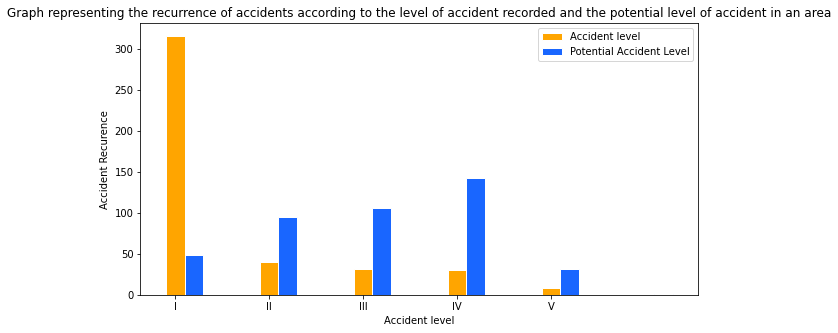

In [18]:
#Plot:
plt.figure(figsize=(10,5))
plt.bar(r11, bar1,color='#FFA500', width=l_bar, edgecolor='white', label="Accident level")

plt.bar(r2, bar2,color='#1966FF', width=l_bar, edgecolor='white', label="Potential Accident Level")

plt.xlabel("Accident level")
plt.xticks([x for x in range(len(bar1))],['I','II','III','IV','V'])
plt.ylabel("Accident Recurence")
plt.legend()
plt.title("Graph representing the recurrence of accidents according to the level of accident recorded and the potential level of accident in an area")

# **Accident counts per month and year:**

In [20]:
#Reccurence of accidents per month and year:

#Year
df2['Year']=df2['Data'].str[:4]
#Month:
df2['Month'] = df2['Data'].str[5:7]
df2.head()

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description,Year,Month
0,0,1/1/2016 0:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,1/1/,01
1,1,1/2/2016 0:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,1/2/,01
2,2,1/6/2016 0:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,1/6/,01
3,3,1/8/2016 0:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,1/8/,01
4,4,1/10/2016 0:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,1/10,20


In [21]:
#We will try to compoast the recurrence of accidents during each month between 2016 and 2017:

#we start with the year 2016

Year_2016=df2.loc[df2['Year']=='2016'].groupby('Month').count().reset_index()
#We're moving on to the 2017
Year_2017=df2.loc[df2['Year']=='2017'].groupby('Month').count().reset_index()

In [22]:
#bar graph to compare the 7 months between 2016 and 2017:
l_bar = 0.2

bar1 = Year_2016['Data'][0:7]
bar2 = Year_2017['Data'][0:7]

# **The proportion of accidents (males/females) by sector is now considered**

In [27]:
#The required columns are selected:
kind = df2.loc[:,'Industry Sector': 'Genre']
kind.drop(columns =['Accident Level','Potential Accident Level'],inplace = True)


In [28]:
kind=kind.groupby(['Genre','Industry Sector'])['Industry Sector'].count().unstack().reset_index()

In [29]:
kind.head()

Industry Sector,Genre,Metals,Mining,Others
0,Female,13,5,4
1,Male,121,236,46


([<matplotlib.axis.XTick at 0x7f77183517b8>,
 [Text(0, 0, 'Femelle'), Text(0, 0, 'Male')])

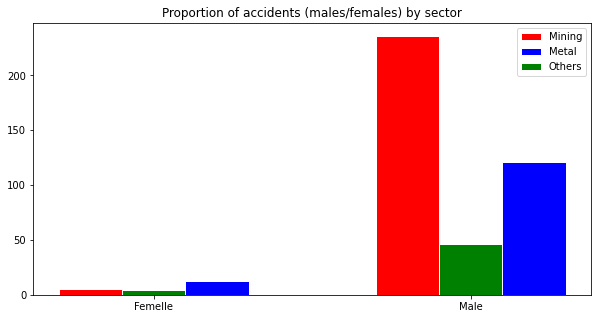

In [30]:
#pLot
l=0.2

min_g=[x for x in range(2)]
oth_g=[x+l for x in range(2)]
met_g=[x+2*l for x in range(2)]
plt.figure(figsize=(10,5))
plt.bar(min_g,kind['Mining'],color='red', width=l, edgecolor='white', label="Mining")
plt.bar(met_g,kind['Metals'],color='blue', width=l, edgecolor='white', label="Metal")
plt.bar(oth_g,kind['Others'],color='green', width=l, edgecolor='white', label="Others")

plt.legend()
plt.title('Proportion of accidents (males/females) by sector')
plt.xticks([x/10 for x in range(2,13,10)],['Femelle','Male'])


# **Relationship between level and description of accidents:**

In [31]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [32]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

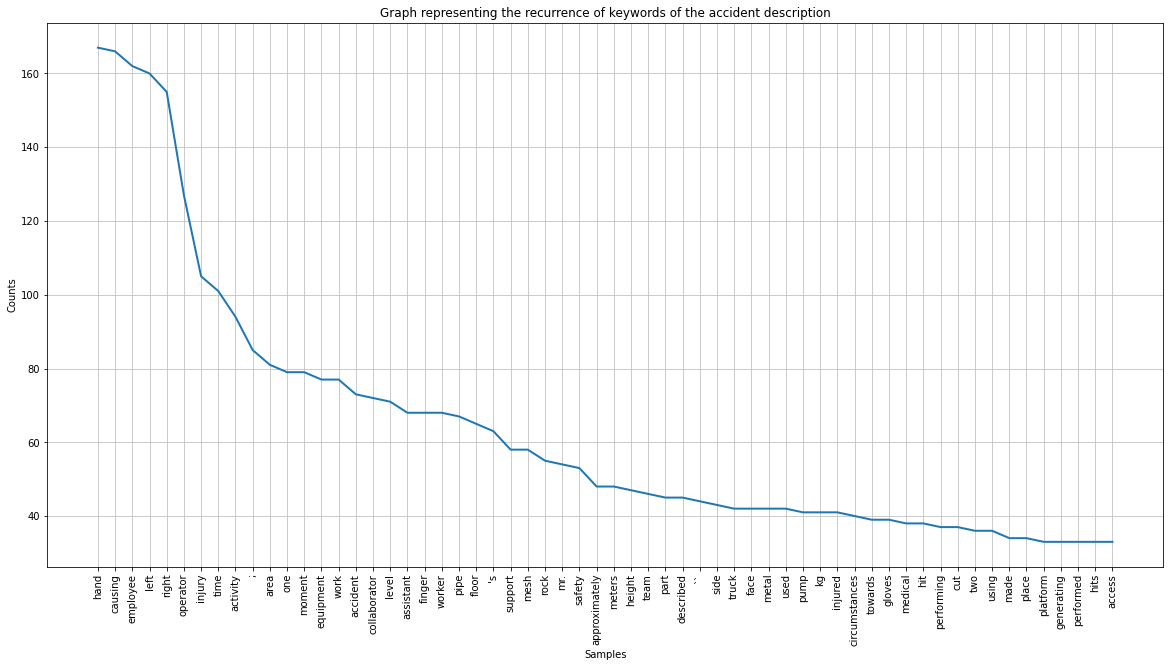

<Figure size 432x288 with 0 Axes>

In [33]:
secc = ['I','II','III','IV','V']
text = ''
for e in secc:
    #print(e)
    acc = df2.loc[:,['Accident Level','Description']].loc[df2['Accident Level'] == e]
    for i in acc['Description']:
      text = text + ' \n' + i 
     #print(i,'\n')

#classify the words in the description :
tokens = n.word_tokenize(text.lower())

#filter the usual words "stopwords" from our token:

stop_words = set(stopwords.words('english'))
#add punctuations:
stop_words.update(['.',',','the','of','and',"'",')','(','-'])
filtred_tokens = [x for x in tokens if  not x  in stop_words]

words_occurrence = n.FreqDist(filtred_tokens)
plt.figure(figsize=(20,10))
plt.title("Graph representing the recurrence of keywords of the accident description")
words_occurrence.plot(60,cumulative = False)
plt.show()
plt.savefig("figure.png")

In [34]:
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures



bi_temp = BigramCollocationFinder.from_words(filtred_tokens)
bi_temp.nbest(BigramAssocMeasures.likelihood_ratio,100)

[('time', 'accident'),
 ('left', 'hand'),
 ('right', 'hand'),
 ('causing', 'injury'),
 ('da', 'silva'),
 ('medical', 'center'),
 ('employee', 'reports'),
 ('allergic', 'reaction'),
 ('injured', 'person'),
 ('split', 'set'),
 ('n', '°'),
 ('injury', 'described'),
 ('``', 'diameter'),
 ('finger', 'left'),
 ('described', 'injury'),
 ('manoel', 'da'),
 ('middle', 'finger'),
 ('support', 'mesh'),
 ('left', 'foot'),
 ('made', 'use'),
 ('upper', 'part'),
 ('degree', 'burn'),
 ('fragment', 'rock'),
 ('ring', 'finger'),
 ('wearing', 'safety'),
 ('area', '\u200b\u200bthe'),
 ('master', 'loader'),
 ('safety', 'gloves'),
 ('stilson', 'key'),
 ('index', 'finger'),
 ('4', '``'),
 ('transferred', 'medical'),
 ('soil', 'sampling'),
 ('time', 'event'),
 ('right', 'leg'),
 ('gives', 'access'),
 ('normal', 'activities'),
 ('lesion', 'described'),
 ('right', 'side'),
 ('line', 'fire'),
 ('recovery', 'boiler'),
 ('thermal', 'recovery'),
 ('enter', 'forest'),
 ('rotation', 'unit'),
 ('medical', 'service'),


In [35]:
from nltk.collocations import TrigramCollocationFinder
from nltk.metrics import TrigramAssocMeasures



bi_temp = TrigramCollocationFinder.from_words([x for x in filtred_tokens if not x in ['accident']])
tri = bi_temp.nbest(TrigramAssocMeasures.likelihood_ratio,100)

tri_dist = n.FreqDist(tri)
#plt.figure(figsize=(20,10))
#tri.plot(100,cumulative = False)
tri

[('finger', 'left', 'hand'),
 ('finger', 'right', 'hand'),
 ('left', 'hand', 'causing'),
 ("'s", 'left', 'hand'),
 ('palm', 'left', 'hand'),
 ('back', 'left', 'hand'),
 ('fingers', 'left', 'hand'),
 ('left', 'hand', 'generating'),
 ('causing', 'injury', 'described'),
 ('thumb', 'left', 'hand'),
 ('wrist', 'left', 'hand'),
 ('strike', 'left', 'hand'),
 ('holding', 'left', 'hand'),
 ('left', 'hand', 'pressed'),
 ('left', 'hand', 'employee'),
 ('left', 'hand', 'bar'),
 ('chirodactile', 'left', 'hand'),
 ('left', 'hand', '..'),
 ('left', 'hand', '10:25'),
 ('left', 'hand', 'command'),
 ('left', 'hand', 'connector'),
 ('left', 'hand', 'die'),
 ('left', 'hand', 'injuring'),
 ('left', 'hand', 'inspecting'),
 ('left', 'hand', 'volvo'),
 ('quirodactilo', 'left', 'hand'),
 ('strips', 'left', 'hand'),
 ('glove', 'left', 'hand'),
 ('pressing', 'left', 'hand'),
 ('wound', 'left', 'hand'),
 ('onto', 'left', 'hand'),
 ('left', 'hand', 'structure'),
 ('hit', 'left', 'hand'),
 ('left', 'hand', 'cloths'

# **Modelling**

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score,validation_curve
from sklearn.metrics import accuracy_score
import joblib
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier

In [44]:
df2['Pays']=df2['Countries'].str[-1]
X=pd.concat([df2['Genre'],df2['Accident Level'],df2['Potential Accident Level']],axis = 1)

In [45]:
i=0
for x in X['Genre']:
    if X['Genre'][i] == 'Male':
        X['Genre'][i] =1
    else:
        X['Genre'][i]=2
    i=i+1

In [46]:
i=0
for x in X['Accident Level']:
    if X['Accident Level'][i] == 'I':
        X['Accident Level'][i] =1
    if X['Accident Level'][i] == 'II':
        X['Accident Level'][i] =2
    if X['Accident Level'][i] == 'III':
        X['Accident Level'][i] =3
    if X['Accident Level'][i] == 'IV':
        X['Accident Level'][i] =4
    if X['Accident Level'][i] == 'V':
        X['Accident Level'][i] =5
    i=i+1

In [47]:
i=0
for x in X['Potential Accident Level']:
    if X['Potential Accident Level'][i] == 'I':
        X['Potential Accident Level'][i] =1
    if X['Potential Accident Level'][i] == 'II':
        X['Potential Accident Level'][i] =2
    if X['Potential Accident Level'][i] == 'III':
        X['Potential Accident Level'][i] =3
    if X['Potential Accident Level'][i] == 'IV':
        X['Potential Accident Level'][i] =4
    if X['Potential Accident Level'][i] == 'V':
        X['Potential Accident Level'][i] =5
    if X['Potential Accident Level'][i] == 'VI':
        X['Potential Accident Level'][i] =6
    i=i+1

In [48]:
Y=X['Accident Level']

X=X.drop(columns='Accident Level')

Y=Y.astype('int')

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.1)

score =  0.7441860465116279


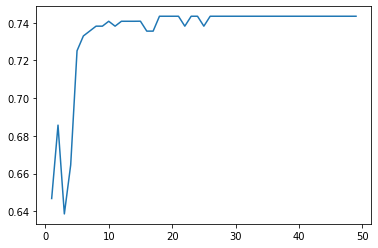

In [50]:
model = KNeighborsClassifier()
train_val, val_score= validation_curve(model,X_train,Y_train,'n_neighbors',np.arange(1,50),cv=5)
plt.plot(np.arange(1,50),val_score.mean(axis=1))
#cross_val_score(KNeighborsClassifier(50),X_train,Y_train,cv=5,scoring='accuracy')
model.fit(X_train,Y_train)
prediction=model.predict(X_test)
score=accuracy_score(Y_test,prediction)
print("score = ",score)


## In my opinion incidents requires an investigation
## Employers are responsible for immediately conducting an investigation into any incident that involves:

## **  Serious injury to a worker or a worker's death Injury requiring medical
##   teatment.
## **  Minor injury, or no injury, but had the potential for causing serious 
##   injury 
## ** Major structural failure or collapse
## **  Major release of hazardous substances
## ** Diving incident, as defined by the Occupational Health and Safety (OHS)  ##   List item
## ** Dangerous incident involving explosive materials
## **  Blasting incident causing personal injury

## Employers who commit health and safety violations may receive administrative penalties — monetary fines. Fines help motivate employers to meet health and safety requirements in the workplace so everyone can stay safe.

## lastly the families of the sufferer in case of death of seviour injury must be taken care of by the Employer.  